**Uploading the training data set**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


**Reading the training data set**

In [0]:
import io
import pandas as pd
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [0]:
train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

**Uploading the test data set**

In [0]:
uploaded = files.upload()

Saving test.csv to test.csv


**Reading the test data set**

In [0]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

**SalePrice**

In [0]:
Y = train.iloc[:, -1]

**Exploratory Analysis**

Here we'll analyze if we have any outliers in the dataset. We'll plot two plots, scatter plot and box plot for the analysis. From the plot we can conclude that there are a few outliers in the plot. We'll remove the rows which have SalePrice greater than 700000.

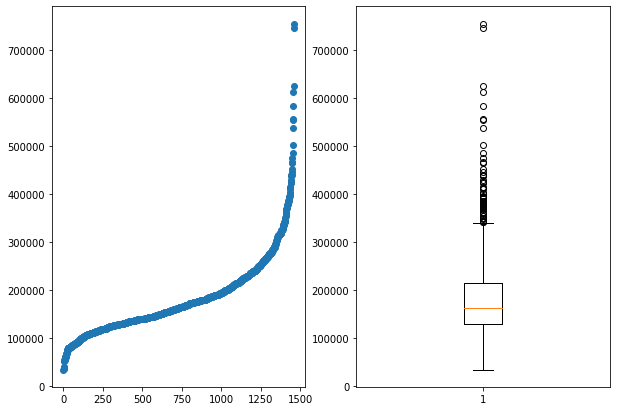

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.subplot(121)
plt.plot(sorted(train['SalePrice']), 'o')
plt.subplot(122)
plt.boxplot(train['SalePrice'])
plt.show()

The below histogram shows the distribution of the SalePrice of the training dataset. As seen from the dataset, the values in the SalePrice are skewed to the right. We'll take the log transformation of the values to make the distribution normal. 

In [0]:
import numpy as np

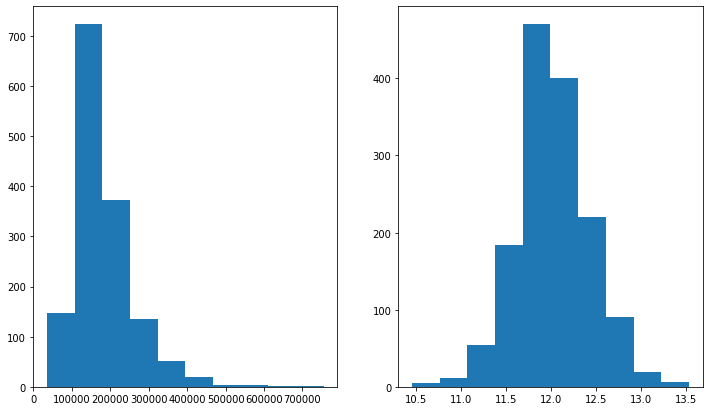

In [0]:
plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.hist(Y)
plt.subplot(122)
plt.hist(np.log(Y))
plt.show()

Y = np.log(Y)

Here we'll identify the number of NaN values in the dataset. The code below shows the columns along with the percentage of null values. The dataset has been filtered to have the columns which have the null values.

In [0]:
null_count_dict = dict()
for col in train.columns:
  null_count_dict[col] = sum(train[col].isna())/train.shape[0]*100

null_count_df = pd.DataFrame.from_dict(null_count_dict, orient='index', columns=['Null_Count']).sort_values(by='Null_Count', ascending=False)
null_count_df = null_count_df[null_count_df['Null_Count'] > 0]
filtered_columns = [col for col in train.columns if col not in null_count_df.index.values]
null_count_df

Null_Count
PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493

**Appending the training and testing datasets for filling the NA values**

In [0]:
dataset = train.iloc[:, :train.shape[1] - 1].append(test, sort=False)

**Populating the missing values in the data set**

In [0]:
dataset['Alley'] = dataset['Alley'].fillna('None')
dataset['PoolQC'] = dataset['PoolQC'].fillna('None')
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('None')
dataset['Fence'] = dataset['Fence'].fillna('None')
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('None')
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
dataset['Utilities'] = dataset['Utilities'].fillna(dataset['Utilities'].mode()[0])
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['BsmtQual'] = dataset['BsmtQual'].fillna('None')
dataset['BsmtCond'] = dataset['BsmtCond'].fillna('None')
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna('None')
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna('None')
dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0)
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna('None')
dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(0)
dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0)
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)
dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].mode()[0])
dataset['GarageType'] = dataset['GarageType'].fillna('None')
dataset['GarageFinish'] = dataset['GarageFinish'].fillna('None')
dataset['GarageCars'] = dataset['GarageCars'].fillna(0)
dataset['GarageArea'] = dataset['GarageArea'].fillna(0)
dataset['GarageQual'] = dataset['GarageQual'].fillna('None')
dataset['GarageCond'] = dataset['GarageCond'].fillna('None')
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
dataset['PoolArea'] = dataset['PoolArea'].fillna(0)

**Changing the data types of the columns**

In [0]:
str_columns = ['MSSubClass', 'YrSold', 'MoSold', 'OverallCond']
dataset[str_columns] = dataset[str_columns].astype(str)

Now that we have imputed the null values, we'll try and find the correlation between the columns of the dataset. For this, we'll use the seaborn package for visualtization. Before doing this, we'll segregate the training and testing datasets from the combined dataset.

In [0]:
X_train = dataset.iloc[:train.shape[0], 1:]
X_test = dataset.iloc[train.shape[0]:, 1:]
X_train['SalePrice'] = Y

# X_train = X_train[X_train['SalePrice'] < np.log(700000)]
X_train = X_train[X_train['GrLivArea'] < 4000]
Y_train = X_train['SalePrice']
X_train = X_train.iloc[:, :-1]

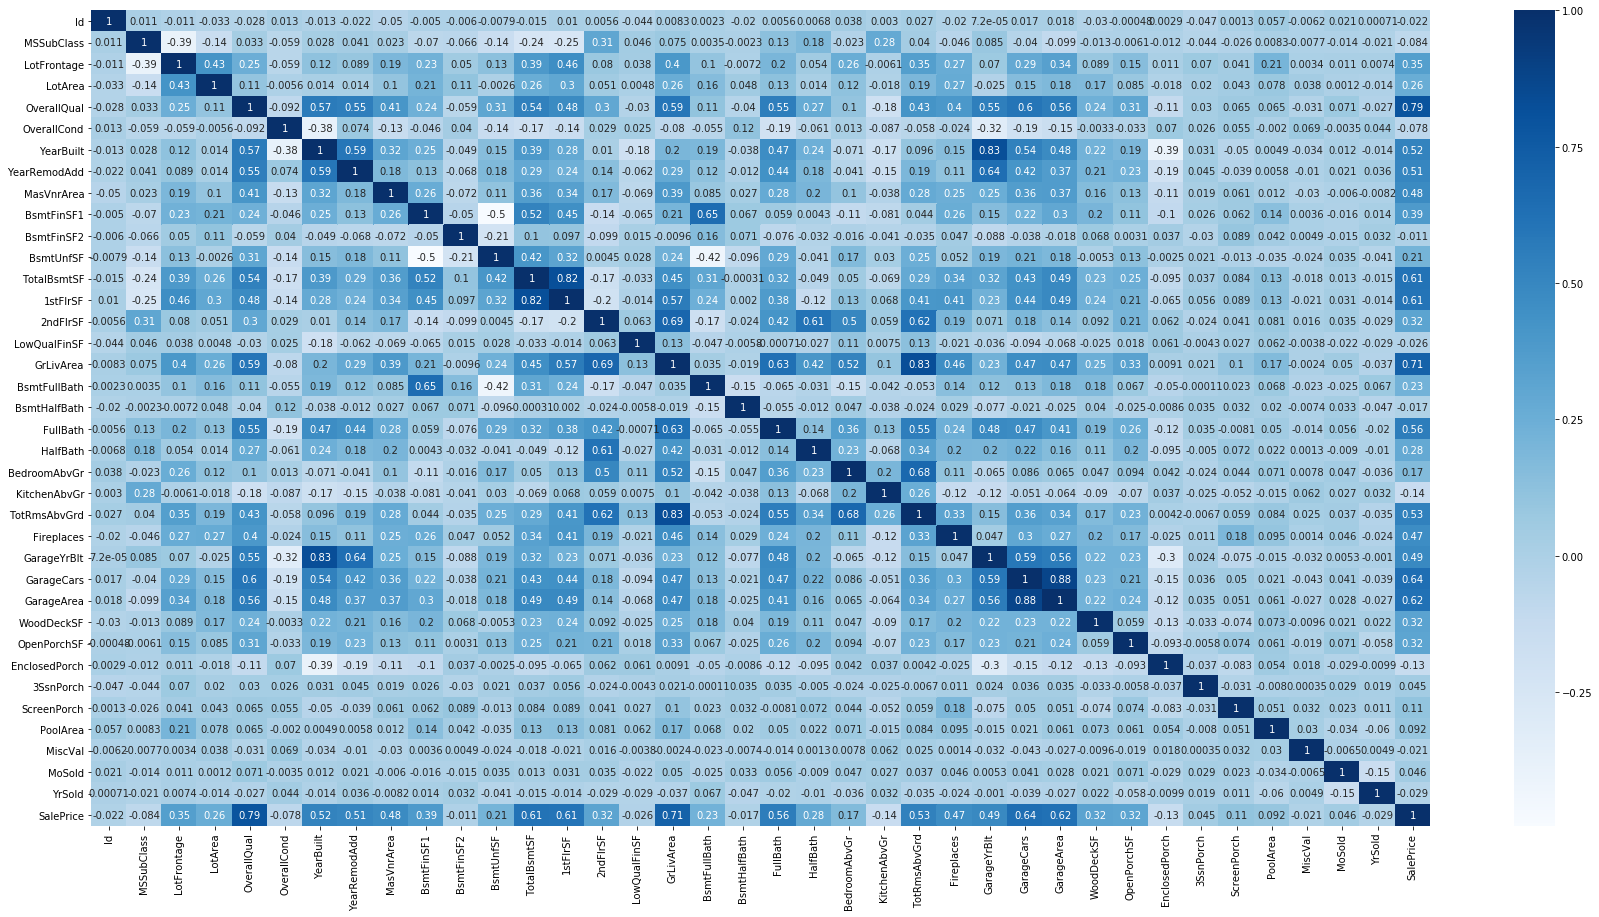

In [0]:
import seaborn as sns
corr = train.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='Blues')

From the correlation plot, we can see that there are a few pairs of columns which have higher values of correlation values. In order to select the column to be dropped from the pair, the column with lower correlation to the SalePrice column is selected to be dropped.

In [0]:
dataset = X_train.append(X_test, sort=False)
dataset = dataset.drop(['TotRmsAbvGrd','GarageArea', 'GarageYrBlt', '1stFlrSF', 'Utilities'], axis=1)

Now that we have the final set of columns and data, we'll see the distribution of the individual columns and identify if we there is a skewness in each column.

In [0]:
quant_columns = dataset.select_dtypes(include=['int', 'float']).columns

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

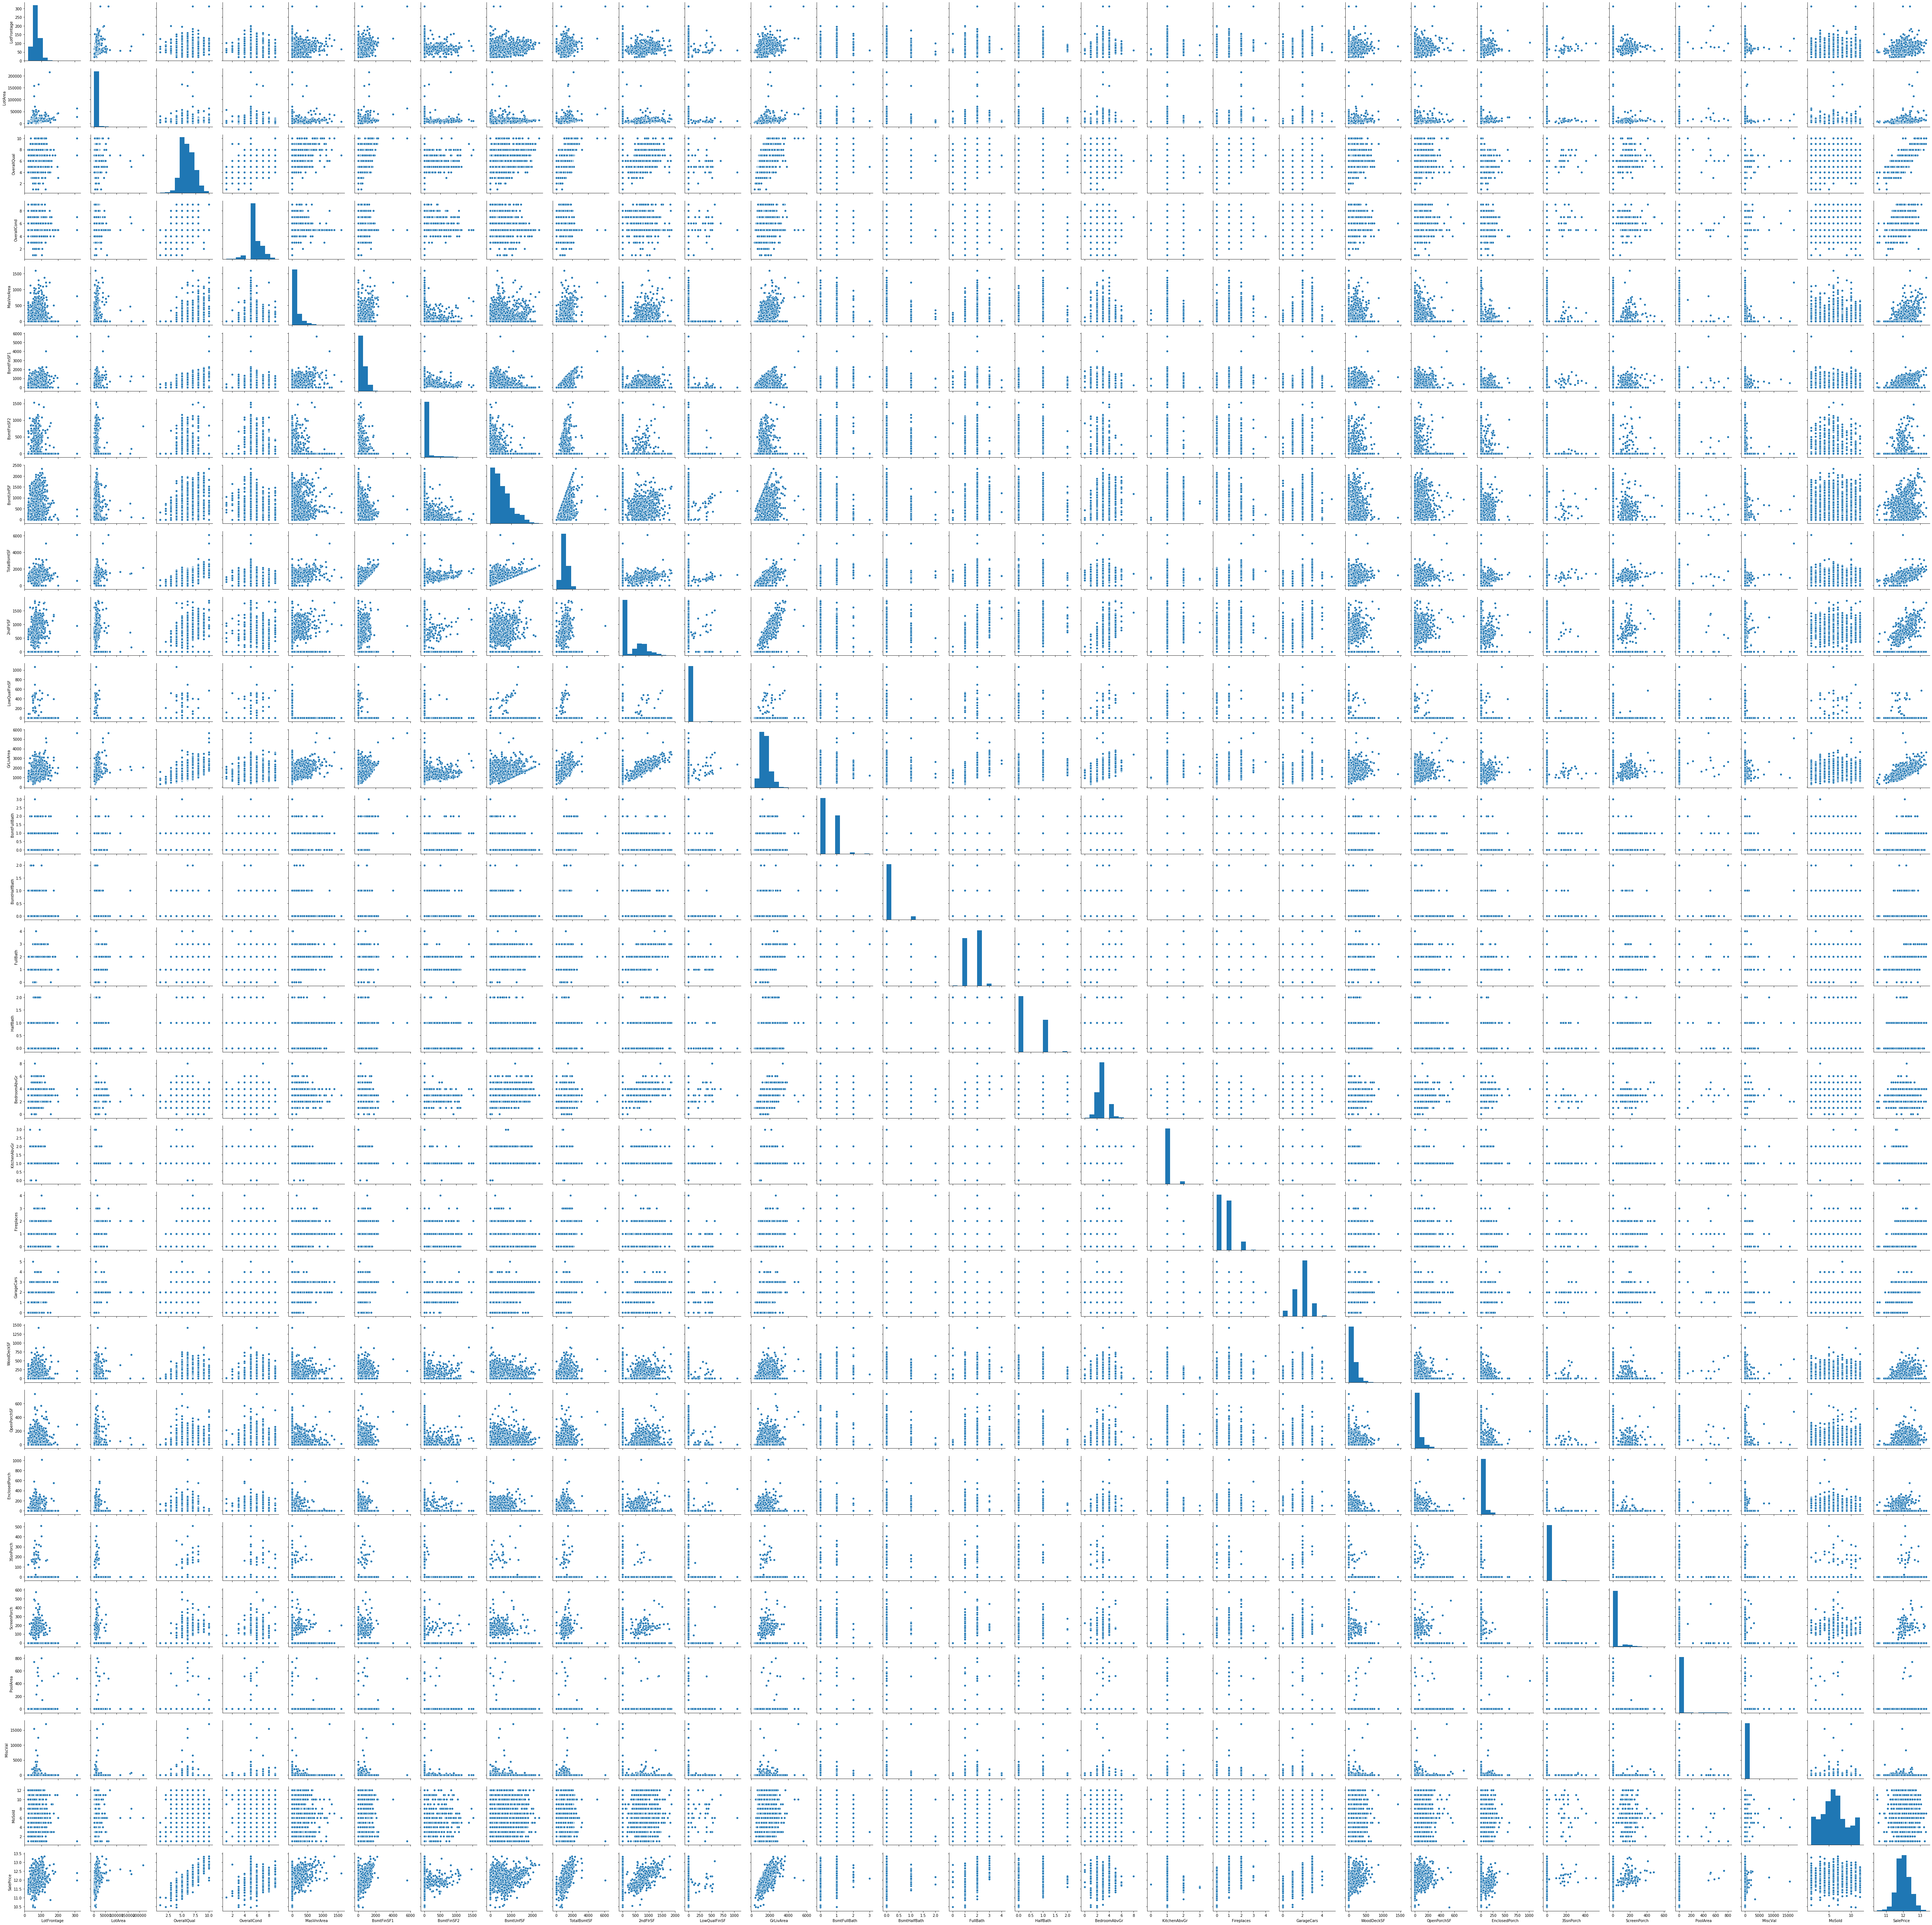

In [0]:
plt.figure()
sns.pairplot(dataset[quant_columns])

In [0]:
skew_columns_bool = dataset[quant_columns].skew(axis=0) > 0.5
skew_columns = skew_columns_bool.loc[skew_columns_bool].index.values
from scipy.stats import boxcox
from sklearn.preprocessing import power_transform
for col in skew_columns:
  dataset[col] = boxcox([data+1 for data in dataset[col]])[0]

**OneHotEncoding**

In [0]:
dataset = pd.get_dummies(dataset)
X_train_encoded = dataset.iloc[:X_train.shape[0], :]
X_test_encoded = dataset.iloc[X_train.shape[0]:, :]

**Building a prediction model**

In [0]:
from sklearn.linear_model import Lasso, Ridge

regressor_lasso = Lasso(alpha=0.0001)
regressor_lasso.fit(X_train_encoded, Y_train)
y_pred = regressor_lasso.predict(X_test_encoded)
print(np.exp(y_pred))

[120780.99845875 161500.78938938 188375.59286872 ... 178242.38704557
 118631.45451166 217127.33104076]


In [0]:
output_df = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(y_pred)})
output_df.to_csv("Submission_3.csv", index=False)

files.download('Submission_3.csv')